# Tutorial 2: Feature importance - (GS)

---

The aim of this notebook, is to reorder the 2074 columns according to their importance

First, let us recall the data from the previous notebook

In [1]:
%store -r df_input_GS
%store -r y_GS
%store -r df_GS


<b><i> Data splitting </i></b> 

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GS, y_GS, test_size = 0.3, random_state=3, stratify=y_GS) # train and valid sets

In [3]:
print(Xtrain.shape)
print(Xtest.shape)

(352, 2074)
(151, 2074)


---

<b><i> Permutation Importance </i></b> 

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from random import *
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
featImp_GS = [] # an empty list to store the important features

In [23]:
# for i in range (1000): # we will take the average of 1000 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
#     print("itr: " + str(i))
    
#     RandomStateValid = randrange(50)
#     ranodmSplitValid = random.uniform(0.2, 0.5)
#     XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( np.array(Xtrain), np.array(Ytrain), test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
#     print("Train shape: "+str(XtrainPer.shape))
#     print("Valid shape: "+str(XvalidPer.shape))
#     print()
   
#     # train
#     model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs = -1)
#     model.fit(XtrainPer, YtrainPer)
    
#     results = permutation_importance(model, XvalidPer, YvalidPer, scoring='precision_macro', n_repeats = 10, n_jobs = -1)
#     importance = results.importances_mean
#     # print(importance)

#     featImp_GS.append(importance)

itr: 0
Train shape: (279, 2074)
Valid shape: (73, 2074)

itr: 1
Train shape: (209, 2074)
Valid shape: (143, 2074)

itr: 2
Train shape: (184, 2074)
Valid shape: (168, 2074)

itr: 3
Train shape: (243, 2074)
Valid shape: (109, 2074)

itr: 4
Train shape: (185, 2074)
Valid shape: (167, 2074)

itr: 5
Train shape: (217, 2074)
Valid shape: (135, 2074)

itr: 6
Train shape: (250, 2074)
Valid shape: (102, 2074)

itr: 7
Train shape: (229, 2074)
Valid shape: (123, 2074)

itr: 8
Train shape: (228, 2074)
Valid shape: (124, 2074)

itr: 9
Train shape: (178, 2074)
Valid shape: (174, 2074)

itr: 10
Train shape: (221, 2074)
Valid shape: (131, 2074)

itr: 11
Train shape: (245, 2074)
Valid shape: (107, 2074)

itr: 12
Train shape: (270, 2074)
Valid shape: (82, 2074)

itr: 13
Train shape: (188, 2074)
Valid shape: (164, 2074)

itr: 14
Train shape: (227, 2074)
Valid shape: (125, 2074)

itr: 15
Train shape: (204, 2074)
Valid shape: (148, 2074)

itr: 16
Train shape: (212, 2074)
Valid shape: (140, 2074)

itr: 17
T

In [5]:
# %store featImp_GS
# featImp_GS_minMax = featImp_GS
# %store featImp_GS_minMax

UsageError: Unknown variable 'featImp_GS'


In [3]:
%store -r featImp_GS


In [4]:
np.array(featImp_GS).shape

(1000, 2074)

---

<b><i>Importance Graph </i></b> 

In [5]:
arrimp = np.array(featImp_GS).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])
print(arrimp[sorted_idx[-10:]])

[1793 1775 2048   31    3 1771  544 1781   17   45]
[0.00030947 0.00031381 0.00031855 0.00031967 0.00031967 0.00035595
 0.00035849 0.00038194 0.00040836 0.00042231]


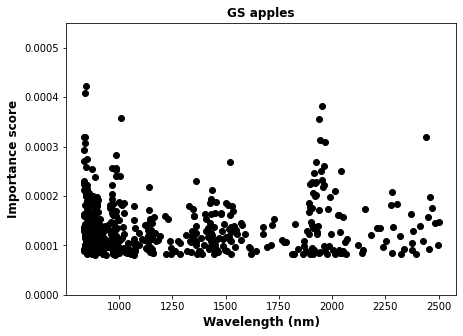

In [7]:
n = 500
rand  = np.random.randint(len(y_GS), size= n)

plt.rcParams["figure.figsize"] = (7,5)# 'xtick.labelsize', 'ytick.labelsize'
plt.scatter(df_input_GS.columns[sorted_idx][-n:], arrimp[sorted_idx][-n:], color = 'black')


plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Importance score", fontweight ='bold', fontsize =12)
plt.ylim([0., .00055])
plt.show()

The problem with Permutation importance that it suffers when features are highly correlated [(ref)](https://christophm.github.io/interpretable-ml-book/feature-importance.html). Regardless the above figure is importnat beacuse it shows that there are regoins which are more importnat than others. 

---